In [68]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### Parameters

In [69]:
def p(x): # probability
    return 10**(-0.2*x/10)

# swapping probability q
# 3 gates with p=1/4 each

# split the link into N 'sublinks'
# ie. add N-1 repeaters
# N+1 total nodes

# number of loop iterations before qubit decays
T_c = np.inf # qubit coherence lifetime

# repeat {iter} times to increase statistical significance
# iter = 100

Combining n sublinks requires swapping at n-1 repeaters.
```u---------------u   0 swaps
u-------r-------u   1 swap
u---r---r---r---u   3 swaps
u-r-r-r-r-r-r-r-u   7 swaps

No decoherence for now.

In [70]:
def dir_path(L,iter):
    dir_list = []
    for _ in range(iter):
        hasGHZ = False
        counter = 0
        while not hasGHZ:
            counter += 1
            if np.random.rand() < p(L):
                hasGHZ = True
        dir_list.append(counter)
    return dir_list

In [71]:
def path(L,N,iter,protocol,q):
    if protocol not in {'SaR','SaE'}:
            raise ValueError("Algorithm must be SaR (Swap as Ready) or SaE (Swap at End).")
    
    if N==1: # no repeaters
        dir_list = []
        for _ in range(iter):
            hasGHZ = False
            counter = 0
            while not hasGHZ:
                counter += 1
                if np.random.rand() < p(L):
                    hasGHZ = True
            dir_list.append(counter)
        return dir_list
    
    elif N>1: # repeaters
        rep_list = []

        sublink_dict_unchanged = {}
        shortest_sublink_list = []
        for i in range(1,N+1):
            sublink = (i-1,i)
            sublink_dict_unchanged[sublink] = False
            shortest_sublink_list.append(sublink)
        sublink_dict_unchanged[(0,N)] = False

        for _ in range(iter):
            sublink_dict = sublink_dict_unchanged.copy()
            hasGHZ = False
            counter = 0
            while not hasGHZ:
                counter += 1
                for e in shortest_sublink_list:
                    if not sublink_dict[e]:
                        if np.random.rand() < p(L/N):
                            sublink_dict[e] = True

                if all([sublink_dict[e] for e in shortest_sublink_list]) or protocol == 'SaR':
                    for node in range(1,N):
                        starting_edge = None
                        ending_edge = None
                        for e in sublink_dict:
                            if sublink_dict[e]:
                                if starting_edge == None:
                                    if e[1] == node:
                                        starting_edge = e
                                if ending_edge == None:
                                    if e[0] == node:
                                        ending_edge = e
                        if starting_edge != None and ending_edge != None:
                            if np.random.rand() < q:
                                sublink_dict[(starting_edge[0],ending_edge[1])] = True
                            sublink_dict[starting_edge] = False
                            sublink_dict[ending_edge] = False

                    if sublink_dict[(0,N)]:
                        hasGHZ = True
                        rep_list.append(counter)
        return rep_list

In [72]:
def plots(L,iters,max_n,q):
    dir_counts = path(L,1,100000,'SaE',q)
    #print(f'direct: mean - {np.mean(dir_counts)}, std - {np.std(dir_counts, ddof=1)}')

    x = np.linspace(0, 5, 10)
    dir_y = np.mean(dir_counts) * np.ones_like(x)

    rep_x = []
    SaE_y = []
    SaR_y = []

    for n in range(2,max_n+1):
        rep_SaE = path(L,n,iters,'SaE',q)
        #print(f'SaE: mean - {np.mean(rep_SaE)}, std - {np.std(rep_SaE, ddof=1)}')
        
        rep_SaR = path(L,n,iters,'SaR',q)
        #print(f'SaR: mean - {np.mean(rep_SaR)}, std - {np.std(rep_SaR, ddof=1)}')

        rep_x.append(n)
        SaE_y.append(np.mean(rep_SaE))
        SaR_y.append(np.mean(rep_SaR))

    plt.plot(rep_x, SaE_y, label=f'repeater SaE', marker='x',color='blue')
    plt.plot(rep_x, SaR_y, label=f'repeater SaR', marker='x',color='green')
    plt.plot(x, dir_y, label='direct')
    plt.xlabel('N (#repeaters + 1)')
    plt.ylabel('Mean #iter.')
    #plt.xlim(0)
    #plt.ylim(0)
    plt.title(f'L={L} km, q={q}, {iters} iterations')
    plt.legend()
    plt.show()


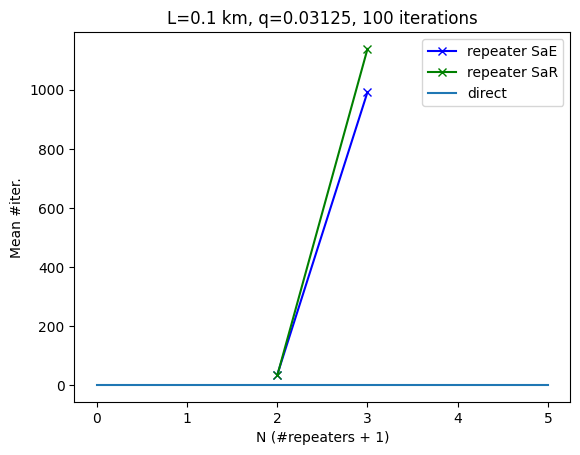

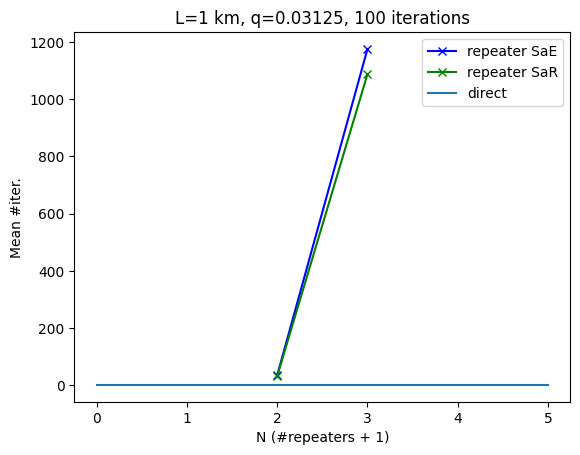

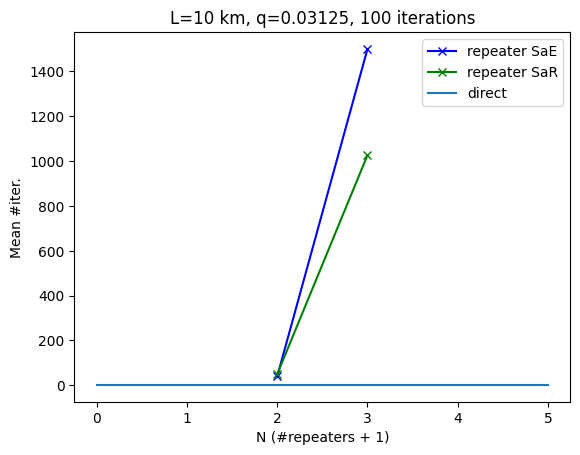

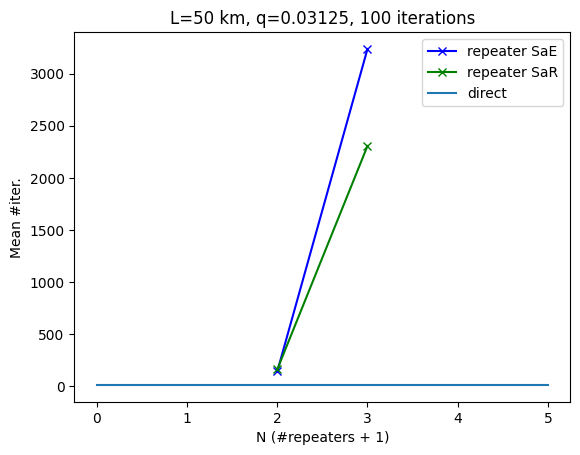

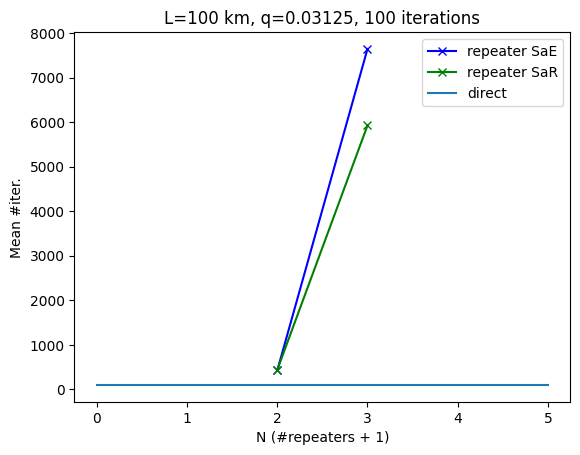

In [85]:
for n in [0.1,1,10,50,100]:
    plots(n,100,3,1/32)

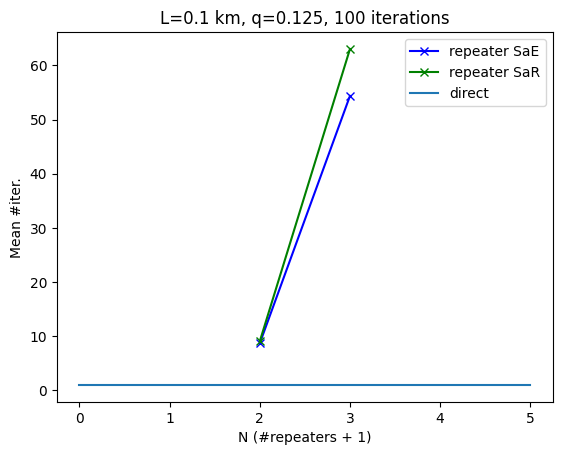

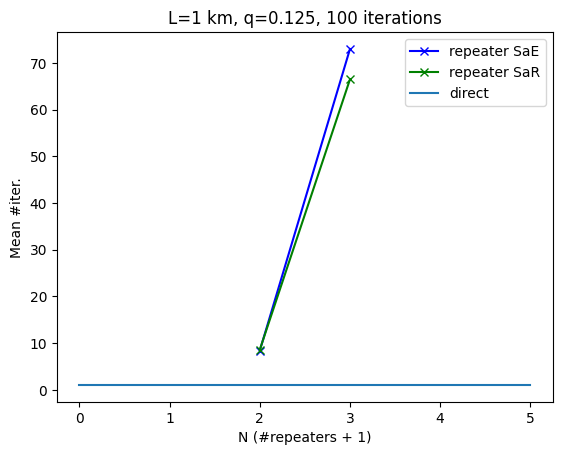

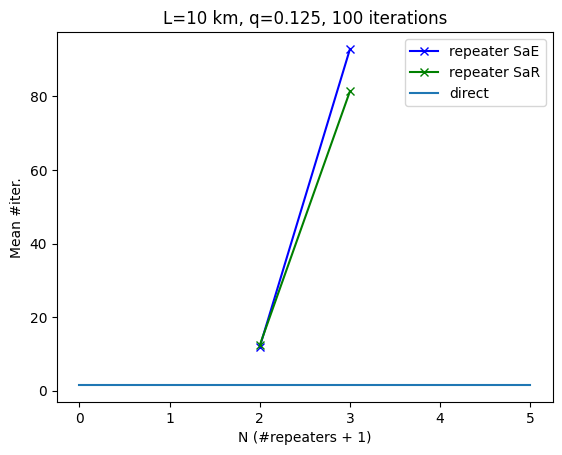

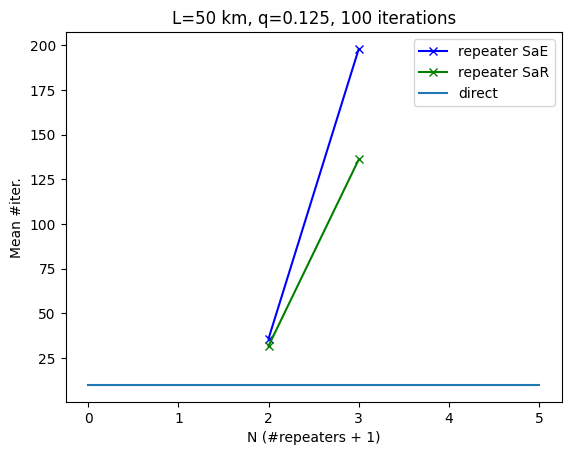

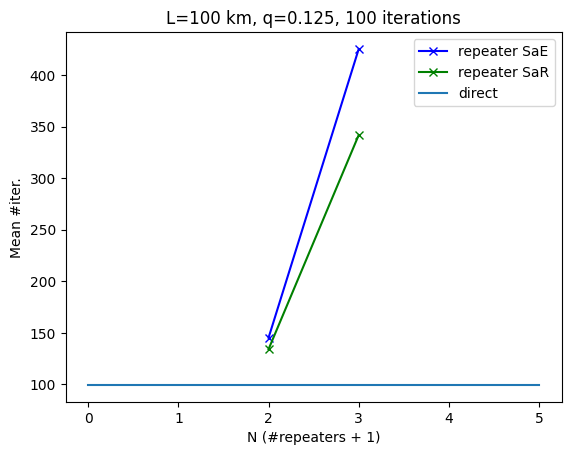

In [86]:
for n in [0.1,1,10,50,100]:
    plots(n,100,3,1/8)

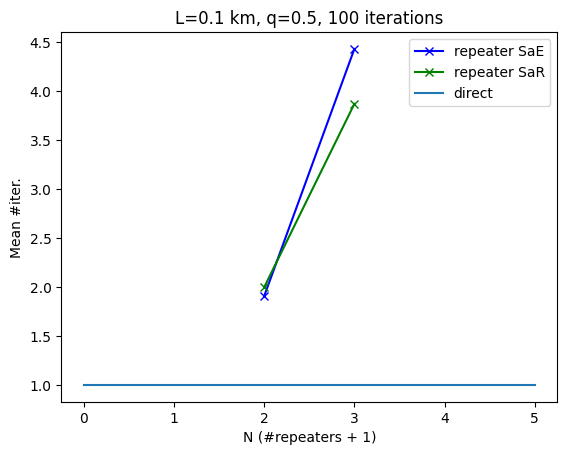

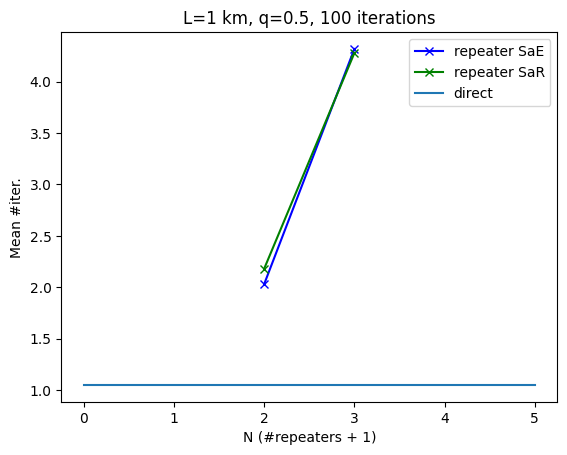

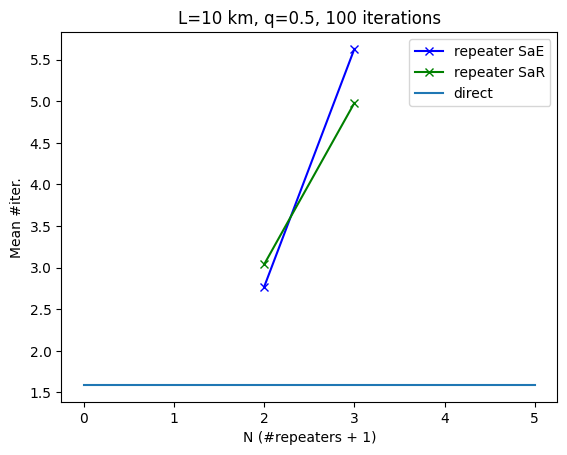

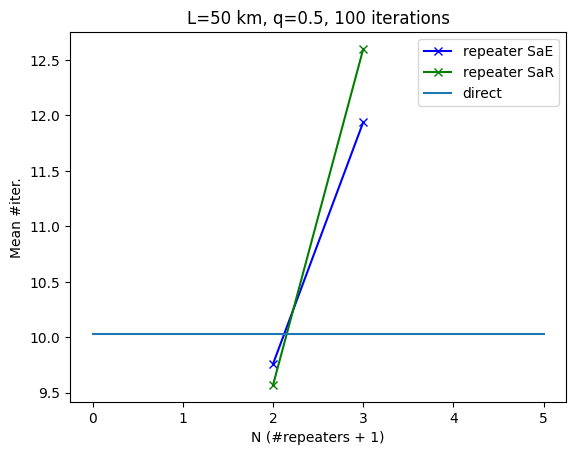

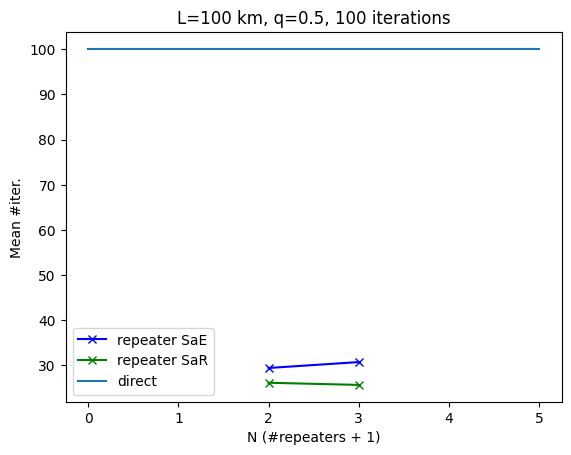

In [87]:
for n in [0.1,1,10,50,100]:
    plots(n,100,3,1/2)

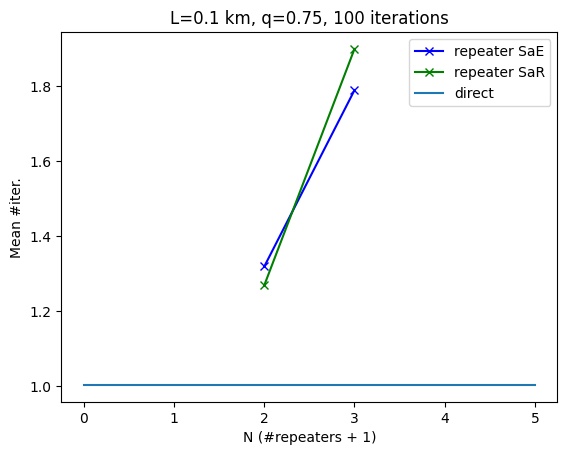

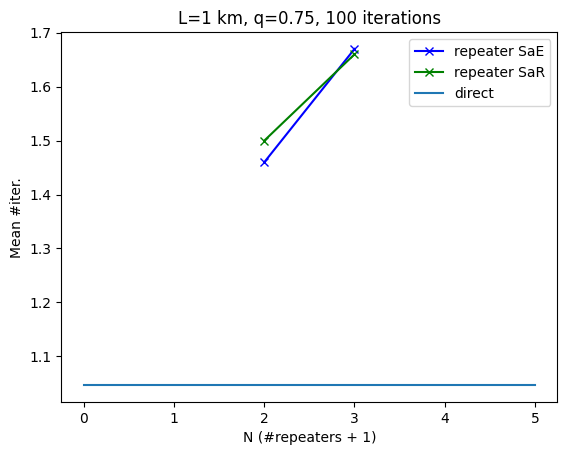

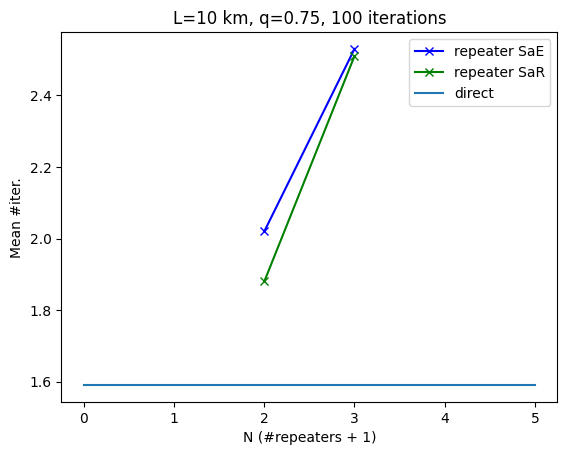

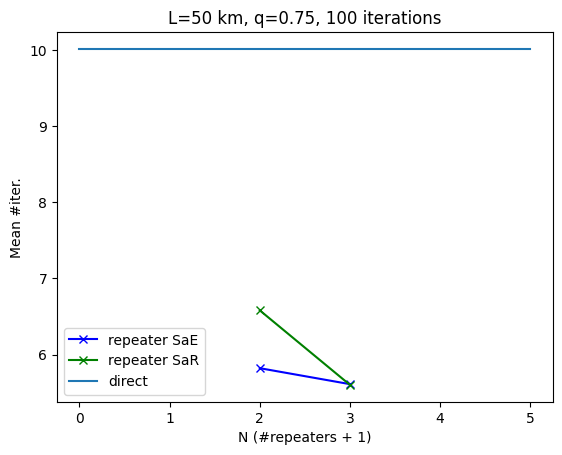

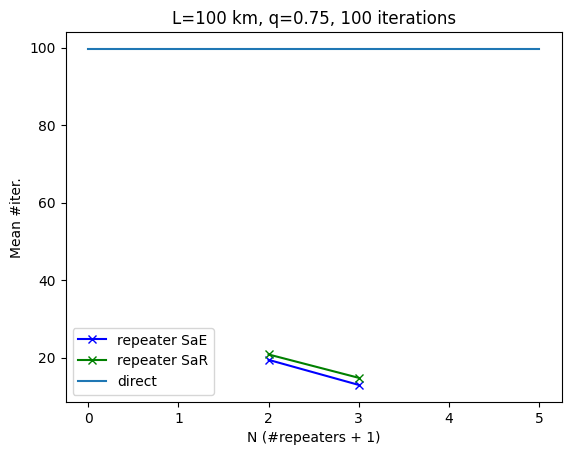

In [89]:
for n in [0.1,1,10,50,100]:
    plots(n,100,3,0.75)

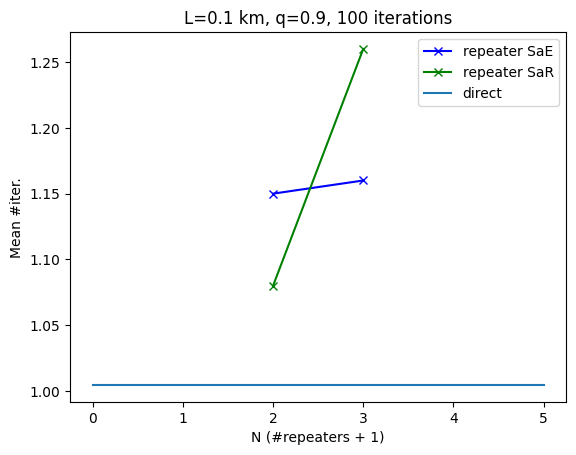

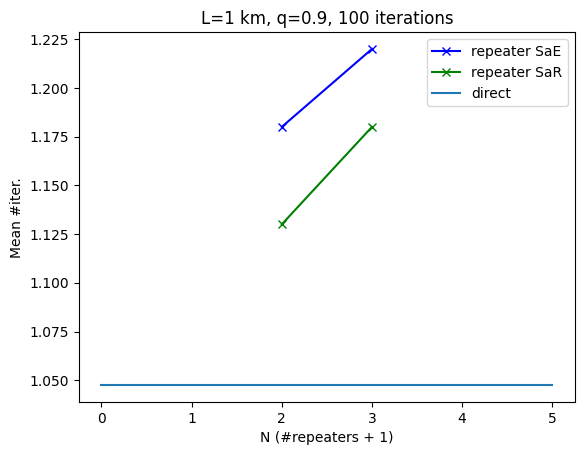

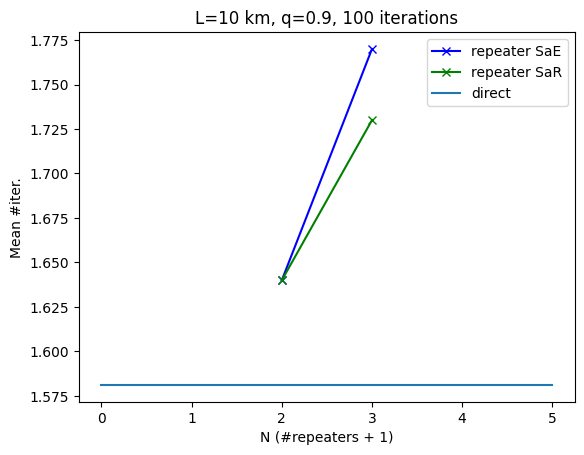

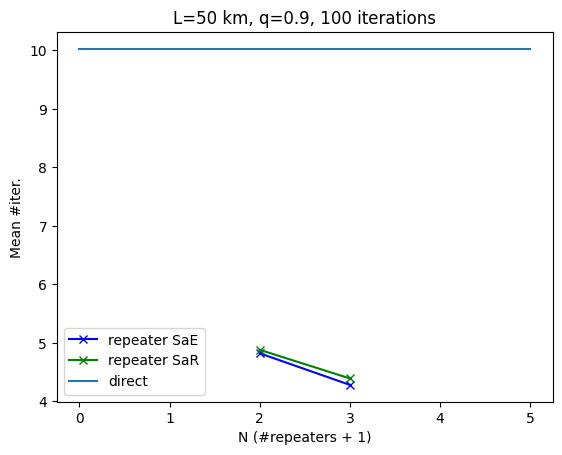

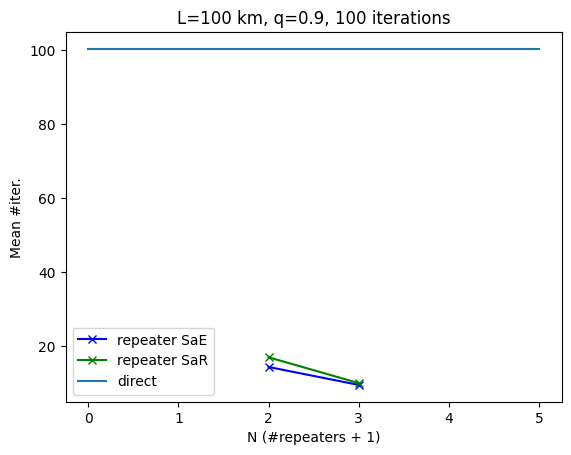

In [95]:
for n in [0.1,1,10,50,100]:
    plots(n,100,3,0.9)

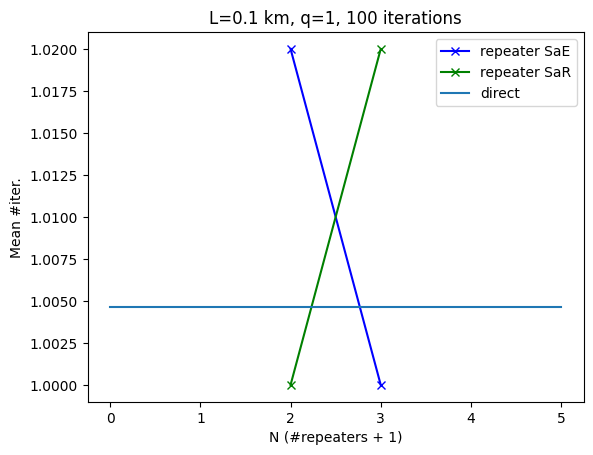

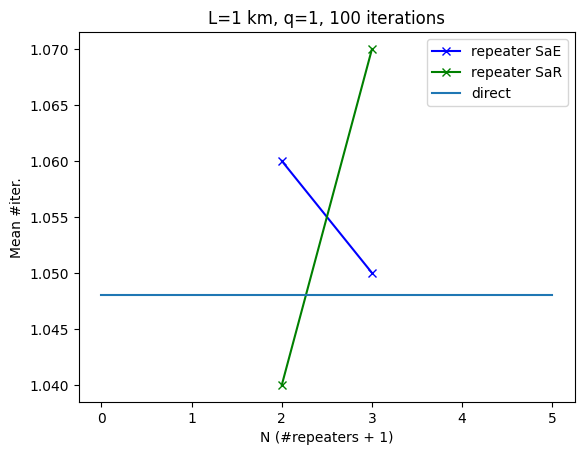

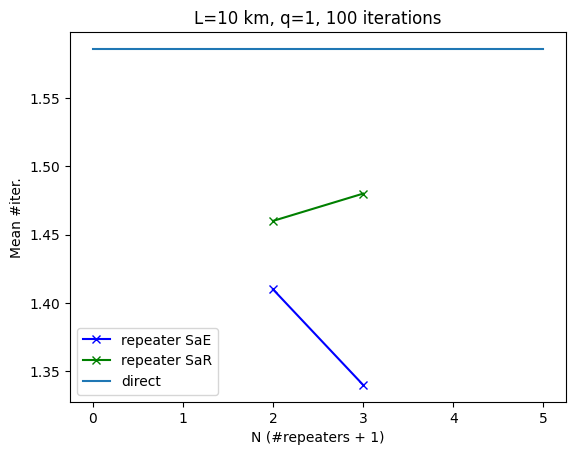

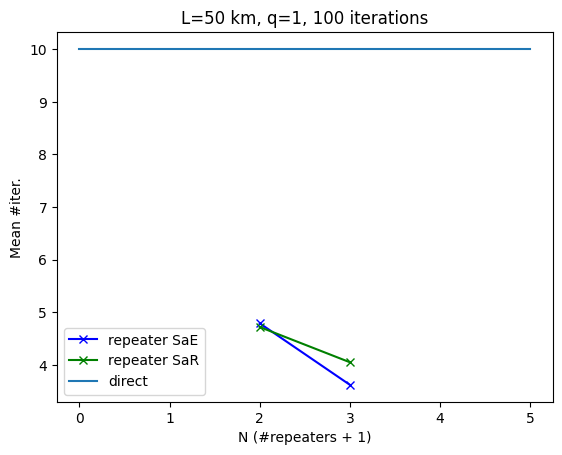

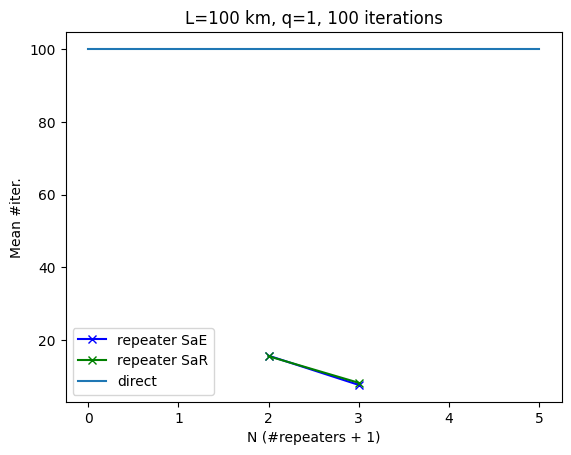

In [92]:
for n in [0.1,1,10,50,100]:
    plots(n,100,3,1)